# k-means clustering of Z1000 HGT over New Zealand

In [141]:
%matplotlib inline
import os
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap as bm
import xarray as xr

In [142]:
from datetime import datetime, timedelta
from dateutil.parser import parse as dparse
import arrow
import calendar

In [143]:
from glob import glob

In [144]:
lfiles = glob('../data/NZ/*.nc') 

## reads in the dataset

In [5]:
dset = xr.open_mfdataset(lfiles)

In [6]:
dset

<xarray.Dataset>
Dimensions:  (lat: 13, level: 1, lon: 11, time: 13149)
Coordinates:
  * level    (level) float32 1000.0
  * lat      (lat) float32 -25.0 -27.5 -30.0 -32.5 -35.0 -37.5 -40.0 -42.5 ...
  * lon      (lon) float32 160.0 162.5 165.0 167.5 170.0 172.5 175.0 177.5 ...
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 1979-01-03 ...
Data variables:
    hgt      (time, level, lat, lon) float64 dask.array<shape=(13149, 1, 13, 11), chunksize=(365, 1, 13, 11)>
Attributes:
    Conventions:    COARDS
    title:          mean daily NMC Reanalysis (1979)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    history:        Thu Nov 30 10:07:05 2017: ncks -FOa -d lat,-55.,-25. -d l...
    References:     http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reana...
    dataset_title:  NCEP-NCAR Reanalysis 1
    NCO:            4.4.8

In [7]:
dset.load()

<xarray.Dataset>
Dimensions:  (lat: 13, level: 1, lon: 11, time: 13149)
Coordinates:
  * level    (level) float32 1000.0
  * lat      (lat) float32 -25.0 -27.5 -30.0 -32.5 -35.0 -37.5 -40.0 -42.5 ...
  * lon      (lon) float32 160.0 162.5 165.0 167.5 170.0 172.5 175.0 177.5 ...
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 1979-01-03 ...
Data variables:
    hgt      (time, level, lat, lon) float64 102.0 100.0 97.0 95.0 94.0 92.0 ...
Attributes:
    Conventions:    COARDS
    title:          mean daily NMC Reanalysis (1979)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    history:        Thu Nov 30 10:07:05 2017: ncks -FOa -d lat,-55.,-25. -d l...
    References:     http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reana...
    dataset_title:  NCEP-NCAR Reanalysis 1
    NCO:            4.4.8

In [8]:
dset = dset.squeeze()

In [9]:
dsetm = dset.mean('time')

In [10]:
dsetm.load()

<xarray.Dataset>
Dimensions:  (lat: 13, lon: 11)
Coordinates:
  * lat      (lat) float32 -25.0 -27.5 -30.0 -32.5 -35.0 -37.5 -40.0 -42.5 ...
  * lon      (lon) float32 160.0 162.5 165.0 167.5 170.0 172.5 175.0 177.5 ...
Data variables:
    hgt      (lat, lon) float64 132.9 132.0 131.2 130.5 129.7 128.8 127.9 ...

In [22]:
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [23]:
lat = dset.lat
lon = dset.lon

In [24]:
lons, lats = np.meshgrid(lon, lat)

In [25]:
central_longitude = 180.

In [26]:
proj = ccrs.PlateCarree(central_longitude=central_longitude)

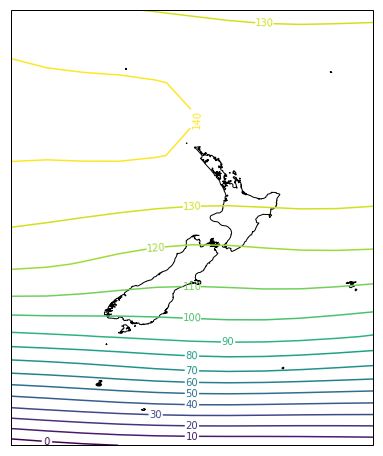

In [36]:
f, ax = plt.subplots(figsize=(10,8), subplot_kw={'projection':proj})

ax.coastlines('10m')

c = ax.contour(lons - central_longitude, lats, dsetm['hgt'], np.arange(-100, 200, 10))

plt.clabel(c, fmt='%i')

ax.set_extent([lon.data.min() - central_longitude, lon.data.max() - central_longitude, lat.data.min(), lat.data.max()], crs=proj)

In [37]:
dset

<xarray.Dataset>
Dimensions:  (lat: 13, lon: 11, time: 13149)
Coordinates:
    level    float32 1000.0
  * lat      (lat) float32 -25.0 -27.5 -30.0 -32.5 -35.0 -37.5 -40.0 -42.5 ...
  * lon      (lon) float32 160.0 162.5 165.0 167.5 170.0 172.5 175.0 177.5 ...
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 1979-01-03 ...
Data variables:
    hgt      (time, lat, lon) float64 102.0 100.0 97.0 95.0 94.0 92.0 87.0 ...
Attributes:
    Conventions:    COARDS
    title:          mean daily NMC Reanalysis (1979)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    history:        Thu Nov 30 10:07:05 2017: ncks -FOa -d lat,-55.,-25. -d l...
    References:     http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reana...
    dataset_title:  NCEP-NCAR Reanalysis 1
    NCO:            4.4.8

In [40]:
hgt = dset['hgt']

In [42]:
hgt_stacked = hgt.stack(lonlat=('lon', 'lat'))

In [43]:
hgt_stacked

<xarray.DataArray 'hgt' (time: 13149, lonlat: 143)>
array([[ 102.  ,  119.  ,  130.  , ...,  -50.  ,  -50.  ,  -41.  ],
       [ 111.  ,  129.  ,  138.  , ...,  -15.  ,  -50.  ,  -72.  ],
       [ 115.  ,  132.  ,  142.  , ...,  -61.  ,  -97.  , -110.  ],
       ..., 
       [  92.75,   94.75,   93.5 , ...,  206.75,  170.5 ,  117.25],
       [  90.5 ,   88.5 ,   85.75, ...,  177.5 ,  154.75,  119.75],
       [ 108.5 ,  120.25,  133.75, ...,   98.5 ,   65.  ,   27.25]])
Coordinates:
    level    float32 1000.0
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 1979-01-03 ...
  * lonlat   (lonlat) MultiIndex
  - lon      (lonlat) float64 160.0 160.0 160.0 160.0 160.0 160.0 160.0 ...
  - lat      (lonlat) float64 -25.0 -27.5 -30.0 -32.5 -35.0 -37.5 -40.0 ...
Attributes:
    units:        m
    precision:    0
    GRIB_id:      7
    GRIB_name:    HGT
    var_desc:     Geopotential height
    dataset:      NCEP Reanalysis Daily Averages
    level_desc:   Multiple levels
    statistic

In [46]:
hgt.shape

(13149, 13, 11)

In [45]:
hgt_stacked.shape

(13149, 143)

In [55]:
X = hgt_stacked.data

In [57]:
X.shape

(13149, 143)

In [56]:
type(X)

numpy.ndarray

### do PCA 

In [49]:
from sklearn.decomposition import pca
from sklearn import preprocessing

In [53]:
scaler  = preprocessing.StandardScaler()

In [58]:
scaler = scaler.fit(X)

In [60]:
X = scaler.transform(X)

In [61]:
X.shape

(13149, 143)

In [66]:
X.mean(0)

array([  5.41390983e-17,  -1.79844478e-17,  -2.26082662e-16,
        -4.96559153e-17,  -5.51216993e-17,  -1.55747172e-16,
        -8.71570247e-17,  -9.94421756e-17,  -1.45901999e-17,
        -6.26500482e-18,  -1.72920888e-17,  -5.81581580e-17,
        -5.29739087e-17,  -9.88975761e-17,   2.80363188e-17,
         1.36424280e-16,   1.26353411e-16,   2.44416720e-16,
        -1.95909107e-16,   9.59086116e-17,  -7.82703433e-17,
         4.08829560e-17,   4.04185689e-17,  -2.71370964e-17,
         3.02273818e-17,  -9.06821453e-18,  -6.52675031e-17,
         2.71839573e-16,  -7.43737129e-17,   1.16079901e-16,
        -1.94422013e-16,   2.63626253e-16,  -3.30728085e-17,
        -1.06893479e-16,   9.69133765e-17,   2.78294554e-17,
         3.92955963e-17,   6.73108065e-17,  -1.28947646e-16,
         3.10286607e-16,   1.77045490e-16,   1.79371648e-16,
         2.23159134e-17,  -3.20655105e-16,   4.32471088e-17,
         1.49532662e-17,   1.33912367e-17,  -8.02798731e-17,
        -1.48941624e-17,

In [65]:
X.std(0)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [67]:
skpca = pca.PCA()

In [68]:
skpca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

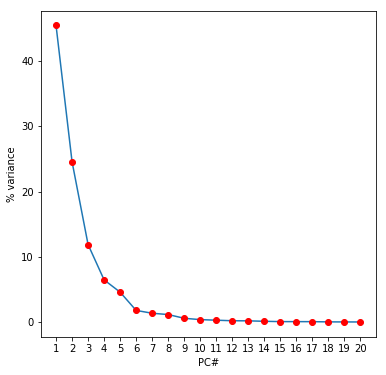

In [81]:
f, ax = plt.subplots(figsize=(6,6))
ax.plot(range(1,21), skpca.explained_variance_ratio_[0:20]*100)
ax.plot(range(1,21), skpca.explained_variance_ratio_[0:20]*100,'ro')
ax.set_xticks(range(1,21)); 
ax.set_xlabel('PC#');
ax.set_ylabel("% variance");

In [75]:
ipc = np.where(skpca.explained_variance_ratio_.cumsum() >= 0.99)[0][0]

In [76]:
ipc

12

In [82]:
PCs = skpca.transform(X)

In [83]:
PCs = PCs[:,:ipc]

In [84]:
EOFs = skpca.components_

In [85]:
EOFs = EOFs[:ipc,:]

In [87]:
EOFs.shape

(12, 143)

In [92]:
EOFs_r = EOFs.reshape((ipc, len(lat), len(lon)), order='F')

In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
scaler_PCs = StandardScaler()

In [99]:
scaler_PCs.fit(PCs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [100]:
PCs_std = scaler_PCs.transform(PCs)

In [108]:
PCdf = pd.DataFrame(PCs_std, index = dset['time'], \
                    columns = ["PC%s" % (x) for x in range(1, PCs_std.shape[1] +1)])

In [109]:
PCdf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
time,,,,,,,,,,,,
1979-01-01,1.454747,-0.004914,-0.681583,1.177158,-0.981580,-0.950569,-0.100291,-0.823627,0.421368,-0.493433,0.106403,0.107588
1979-01-02,1.068404,-0.557630,0.128019,1.251684,-0.621634,-0.557769,0.764169,0.013579,-0.558789,0.011636,-0.155348,-0.183147
1979-01-03,0.741006,-0.201646,-0.931512,0.800119,0.792590,-0.185484,0.960261,0.425951,-1.038543,-0.326917,0.185424,0.247030
1979-01-04,0.237210,0.284980,-1.475062,0.307317,0.169787,-0.196250,0.731868,-0.629962,0.254374,-0.308137,-0.503634,0.839901
1979-01-05,0.009531,-0.161915,-0.980255,0.887172,-1.182188,-0.627278,0.010283,0.025749,0.211898,0.006511,0.250434,0.086898


In [110]:
PCdf.tail()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
time,,,,,,,,,,,,
2014-12-27,-0.882013,0.050516,0.950078,0.899273,-0.458214,0.511476,0.879151,-0.009012,-1.445596,-0.596346,0.416528,-0.065741
2014-12-28,-1.288674,0.480216,0.459599,0.436350,0.419083,-0.285780,0.285227,0.182786,-0.602984,-0.739703,-0.331119,1.263288
2014-12-29,-0.862789,0.956345,1.298209,-0.019461,-0.483458,-1.313037,-0.166247,0.300744,0.350617,0.168606,-0.637740,1.120087
2014-12-30,0.484581,0.545943,2.060762,0.525226,-1.754418,-0.784332,0.318204,0.219137,0.200827,-0.206660,-0.039647,0.201676
2014-12-31,0.693166,-0.296285,0.621441,1.102874,-0.685905,0.805190,1.343148,-0.006584,-1.643915,0.063263,0.871702,0.362293


In [112]:
from sklearn.cluster import KMeans

In [113]:
nclusters = 12

In [114]:
kmeans = KMeans(init='k-means++', n_clusters=nclusters, n_init=10, n_jobs=-1)

In [115]:
kmeans.fit(PCdf.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=12, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [116]:
kmeans.labels_

array([1, 1, 0, ..., 2, 1, 5], dtype=int32)

In [117]:
np.unique(kmeans.labels_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32)

In [118]:
labels = pd.DataFrame(kmeans.labels_, index=dset['time'], columns=['cluster'])

In [120]:
labels.head()

,cluster
time,
1979-01-01,1
1979-01-02,1
1979-01-03,0
1979-01-04,8
1979-01-05,11


In [121]:
c = 0

In [122]:
index = labels.query('cluster == {}'.format(c))

In [126]:
nbdays = len(index)

In [127]:
nbdays

1431

In [123]:
cluster = dset.sel(time=index.index).mean('time')

In [124]:
cluster

<xarray.Dataset>
Dimensions:  (lat: 13, lon: 11)
Coordinates:
  * lat      (lat) float32 -25.0 -27.5 -30.0 -32.5 -35.0 -37.5 -40.0 -42.5 ...
  * lon      (lon) float32 160.0 162.5 165.0 167.5 170.0 172.5 175.0 177.5 ...
Data variables:
    hgt      (lat, lon) float64 156.4 155.5 154.1 152.2 149.6 146.5 143.1 ...

In [128]:
clusters = []
nbdays = []
for c in range(nclusters): 
    index = labels.query('cluster == {}'.format(c)) 
    nbdays.append(len(index))
    cluster = dset.sel(time=index.index).mean('time')
    clusters.append(cluster)

In [130]:
clusters = xr.concat(clusters, dim='cluster')

In [131]:
clusters

<xarray.Dataset>
Dimensions:  (cluster: 12, lat: 13, lon: 11)
Coordinates:
  * lat      (lat) float32 -25.0 -27.5 -30.0 -32.5 -35.0 -37.5 -40.0 -42.5 ...
  * lon      (lon) float32 160.0 162.5 165.0 167.5 170.0 172.5 175.0 177.5 ...
Dimensions without coordinates: cluster
Data variables:
    hgt      (cluster, lat, lon) float64 156.4 155.5 154.1 152.2 149.6 146.5 ...

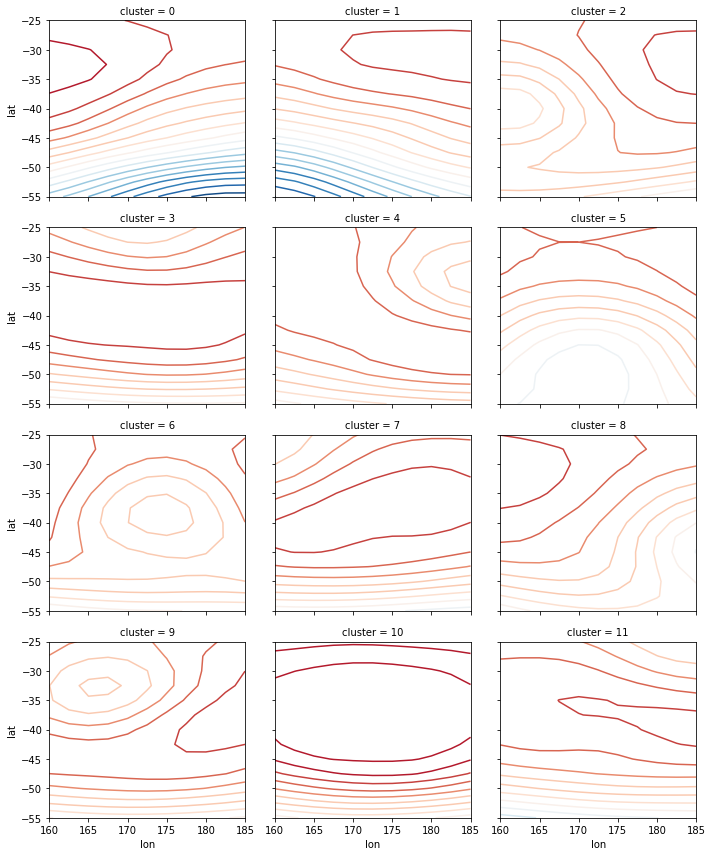

In [140]:
f = clusters['hgt'].plot.contour(x='lon', y='lat', col='cluster', col_wrap=3, levels=np.arange(-150,200,20))

![](./images/Kidson_Archetypes.png)

In [ ]:
def plot_field(X, lons, lats, vmin==100, vmax=200, step=10, ax=ax): 
    